In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.shape

(18207, 89)

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
split = 0.5

In [7]:
features=['Strength','Stamina']

In [8]:
features2 = ['Strength','Stamina','Acceleration','Balance','Reactions','SprintSpeed','Jumping'] 
#'Crossing' 'Finishing' 'HeadingAccuracy' 'ShortPassing' 'Volleys' 'Dribbling' 'Curve' 'FKAccuracy' 'LongPassing' 'BallControl' 'Acceleration' 'SprintSpeed' 'Agility' 'Reactions' 'Balance' 'ShotPower' 'Jumping' 'Stamina' 'Strength' 'LongShots' 'Aggression' 'Interceptions' 'Positioning' 'Vision' 'Penalties' 'Composure' 'Marking' 'StandingTackle' 'SlidingTackle' 'Acceleration','Balance','Stamina','Strength','Aggression','Reaction']

In [9]:
y='Position'

In [10]:
y_categ=['CB','CM','ST']

In [11]:
class fifa():
    def __init__(self, df, features, y, y_categ, split):
        ### Inputs
        self.data=df[df[y].isin(y_categ)][features + [y]]
        self.features=features
        self.y=y
        self.y_categ=y_categ
        self.split=split

        ### Split dataset
        self.train=self.data.sample(frac=self.split,replace=False)
        self.test=self.data[~self.data.index.isin(self.train.index)]

        ### Fit all models on test dataset
        self.lm(),self.lda(),self.qda(),self.mlr()

        ### Fitted values
        self.fitted={'Linear Reg':self.lmPredict(self.test),
                        'LDA':self.ldaPredict(self.test),
                        'QDA': self.qdaPredict(self.test),
                        'MLR':self.mlrPredict(self.test)}
        ### Analysis
        self.balance=[len(self.data[self.data[y]==pos]) for pos in self.y_categ]
        self.confusion={str(key):pd.DataFrame(self.confusion(value[1]),index=['True '+a for a in self.y_categ],columns=self.y_categ) for key,value in self.fitted.items()}
        self.accuracy={str(key):round(sum([value[i]['True '+i] for i in self.y_categ]),3) for key,value in self.confusion.items()}
        self.precision={str(key):[value[j]['True '+j]/sum([value[j]['True '+i] for i in self.y_categ]) for j in self.y_categ] for key,value in self.confusion.items()}
        self.recall = {str(key):[value[j]['True ' + j] / sum([value[i]['True ' + j] for i in self.y_categ]) for j in self.y_categ] for key, value in self.confusion.items()}

    def dataPlot(self):
        ### Explore dataset - ONLY WORKS FOR BIVARIATE CASE
        fig=plt.figure(figsize=(15,5))

        ax=fig.add_subplot(1,2,1)
        ax.set_title('Full Dataset')
        [ax.plot(self.data[self.data[y]==pos][self.features[0]],self.data[self.data[y]==pos][self.features[1]],'x') for pos in self.y_categ]
        ax.set_xlabel(self.features[0])
        ax.set_ylabel(self.features[1])
        ax.legend(y_categ)

        ax2=fig.add_subplot(1,2,2)
        ax2.set_title('Training Dataset')
        [ax2.plot(self.train[self.train[y]==pos][self.features[0]],self.train[self.train[y]==pos][self.features[1]],'x') for pos in self.y_categ]
        ax2.set_xlabel(self.features[0])
        ax2.set_ylabel(self.features[1])
        ax2.legend(y_categ)

        plt.show()
        fig.savefig('dataplot.png')

        fig2 = plt.figure(figsize=(15, 5))

        ax3 = fig2.add_subplot(1, 2, 1)
        ax3.set_title('Test Dataset')
        [ax3.plot(self.test[self.test[y] == pos][self.features[0]], self.test[self.test[y] == pos][self.features[1]],
                 'x') for pos in self.y_categ]
        ax3.set_xlabel(self.features[0])
        ax3.set_ylabel(self.features[1])
        ax3.legend(y_categ)

        ax4 = fig2.add_subplot(1, 2, 2)
        ax4.set_title('Player Count')
        self.balancetest=[len(self.test[self.test[self.y] == pos]) for pos in self.y_categ]
        ax4.bar(self.y_categ,self.balancetest,color='cornflowerblue')
        ax4.set_xlabel('Position')
        ax4.set_ylabel('Count')

        fig2.savefig('Testdataplot.png')
        return fig

    def lm(self):
        ### Perform Linear Regression
        target=np.eye(3)
        ymat=np.vstack([target[self.y_categ.index(pos)] for pos in self.train[self.y]])
        xmat=np.hstack((np.ones((len(self.train.index),1)),self.train[self.features].values))
        def betamat(xmat,ymat):
            xmat_t=np.matrix.transpose(xmat)
            xmat_dot=xmat_t.dot(xmat)
            xmat_dot_i=np.linalg.inv(xmat_dot)
            return xmat_dot_i.dot(xmat_t.dot(ymat))
        self.lm_beta = betamat(xmat, ymat)

    def lmPredict(self,x):
        ### Linear Regression Prediction
        xmat = np.hstack((np.ones((len(x), 1)), x[self.features].values))
        yhat = xmat.dot(self.lm_beta)
        predict = np.array([self.y_categ[int(i)] for i in yhat.argmax(axis=1)])
        return x[self.features].values,predict

    def func_lda(self,x, mu, sigma, pi):
        term1 = x.dot(np.linalg.inv(sigma).dot(mu.T))
        term2 = -0.5 * mu.dot(np.linalg.inv(sigma).dot(mu.T))
        term3 = np.log(pi)
        return term1 + term2 + term3

    def lda(self):
        #Perform Linear Discriminant Analysis parameter estimation

        N=len(self.train.index)
        K=len(self.y_categ)

        self.pi_lda=np.array([len(self.train[self.train[self.y]==i])/len(self.train) for i in self.y_categ])
        self.mu_lda=np.array([[sum(self.train[self.train[y]==i][f].values)/len(self.train[self.train[y]==i]) for f in self.features] for i in self.y_categ])
        self.sigma_lda=np.array(sum([(self.train[self.train[y]==self.y_categ[i]][self.features].values - self.mu_lda[i]).T.\
                                    dot((self.train[self.train[y]==self.y_categ[i]][self.features].values-self.mu_lda[i]))/(N-K)\
                                     for i in range(0,len(self.y_categ))]))

    def ldaPredict(self,x):
        ### LDA Prediction
        xmat_lda = x[self.features].values
        yhat_lda = np.array([[self.func_lda(j, self.mu_lda[i], self.sigma_lda, self.pi_lda[i]) for i in range(0, len(self.y_categ))] \
                    for j in xmat_lda])
        predict = np.array([self.y_categ[int(i)] for i in yhat_lda.argmax(axis=1)])
        return xmat_lda,predict

    def func_qda(self,x, mu, sigma, pi):
        term1 = -0.5 * np.log(np.linalg.det(sigma))
        term2 = -0.5 * (x - mu).dot(np.linalg.inv(sigma).dot((x - mu).T))
        term3 = np.log(pi)
        return term1 + term2 + term3

    def qda(self):
        N = len(self.train.index)
        K = len(self.y_categ)

        self.pi_qda=np.array([len(self.train[self.train[self.y]==i])/len(self.train) for i in self.y_categ])
        self.mu_qda=np.array([[sum(self.train[self.train[y]==i][f].values)/len(self.train[self.train[y]==i]) \
                               for f in self.features] for i in self.y_categ])
        self.sigma_qda = np.array([np.cov(self.train[self.train[y] == self.y_categ[i]][self.features].T.values) \
                                   for i in range(0, len(self.y_categ))])

    def qdaPredict(self,x):
        ### QDA Prediction
        xmat_qda = x[self.features].values
        yhat_qda = np.array([[self.func_qda(j, self.mu_qda[i], self.sigma_qda[i], self.pi_qda[i]) for i in range(0, len(self.y_categ))] \
                    for j in xmat_qda])
        predict = np.array([self.y_categ[int(i)] for i in yhat_qda.argmax(axis=1)])
        return xmat_qda,predict

    def mlr(self):
        ### Multinomial Logistic Regression Fit
        mlr=LogisticRegression(multi_class='multinomial', solver='newton-cg')
        mlr.fit(self.train[self.features],self.train[self.y])
        self.mlr=mlr

    def mlrPredict(self,x):
        predict=self.mlr.predict(x[self.features].values)
        return x[self.features].values,predict

    def modelPlot(self,fitted,title):
        ### General 2d plotting tool
        x,predict=fitted
        classes=[x[predict==i] for i in self.y_categ]

        fig=plt.figure(figsize=(10,6))

        ax=fig.add_subplot(1,2,1)
        ax.set_title('Dataset')
        [ax.plot(self.train[self.train[y]==pos][self.features[0]],self.train[self.train[y]==pos][self.features[1]],'x') for pos in self.y_categ]
        ax.set_xlabel(self.features[0])
        ax.set_ylabel(self.features[1])

        ax2=fig.add_subplot(1,2,2)
        ax2.set_title('Classification by '+str(title))
        [ax2.plot(c[:,0],c[:,1],'x') for c in classes]
        ax2.set_xlabel(self.features[0])
        ax2.set_ylabel(self.features[1])

        plt.show()
        return fig

    def modelPlotAll(self):
        ### General 2d plotting tool
        classes=[[fit[0][fit[1]==i] for i in self.y_categ] for fit in self.fitted.values()]

        fig=plt.figure(figsize=(18,10))

        ax=fig.add_subplot(2,2,1)
        ax.set_title('Classification by Linear Regression')
        [ax.plot(c[:,0],c[:,1],'x') for c in classes[0]]
        ax.set_xlabel(self.features[0])
        ax.set_ylabel(self.features[1])
        ax.legend(y_categ)

        ax2=fig.add_subplot(2,2,2)
        ax2.set_title('Classification by LDA')
        [ax2.plot(c[:,0],c[:,1],'x') for c in classes[1]]
        ax2.set_xlabel(self.features[0])
        ax2.set_ylabel(self.features[1])
        ax2.legend(y_categ)

        ax3 = fig.add_subplot(2, 2, 3)
        ax3.set_title('Classification by QDA')
        [ax3.plot(c[:, 0], c[:, 1], 'x') for c in classes[2]]
        ax3.set_xlabel(self.features[0])
        ax3.set_ylabel(self.features[1])
        ax3.legend(y_categ)

        ax4=fig.add_subplot(2,2,4)
        ax4.set_title('Classification by MLR')
        [ax4.plot(c[:,0],c[:,1],'x') for c in classes[3]]
        ax4.set_xlabel(self.features[0])
        ax4.set_ylabel(self.features[1])
        ax4.legend(y_categ)

        plt.show()
        fig.savefig('AllPlots.png')
        return fig

    def confusion(self,fitted):
        ### Computes general confusion matrix absolute
        actual = self.test[self.y].values
        actual_idx=[actual==i for i in y_categ]
        return np.array([[round(sum(fitted[j]==i),3) for i in y_categ] for j in actual_idx])

    def getMeans(self):
        modelmu=pd.DataFrame({j: {key: [ np.mean(value[0][:, i][value[1] == j]).round(2) \
                    for i in range(len(self.features))]\
                    for key, value in self.fitted.items()} for j in self.y_categ})

        testmu=pd.DataFrame({j:{'Dataset':self.test[self.features][self.test[self.y] ==j].mean().values.round(2)} \
                for j in self.y_categ})
        totalmu=testmu.append(modelmu.round(2))
        print(totalmu)


In [12]:
worker= fifa(df, features, y, y_categ, split)

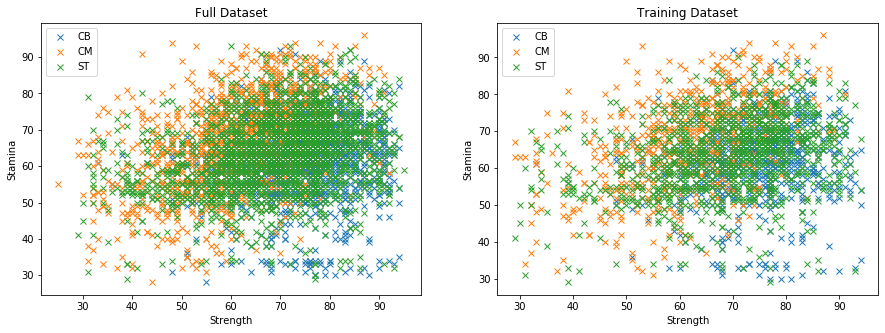

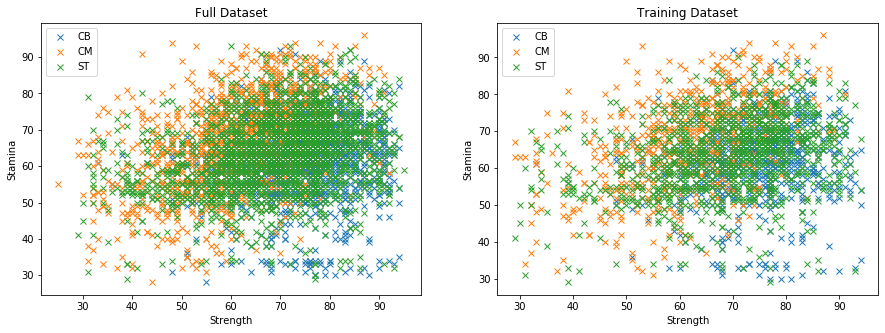

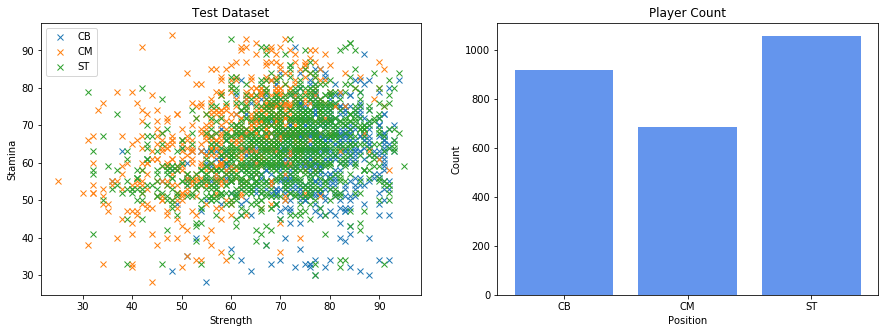

In [13]:
worker.dataPlot()

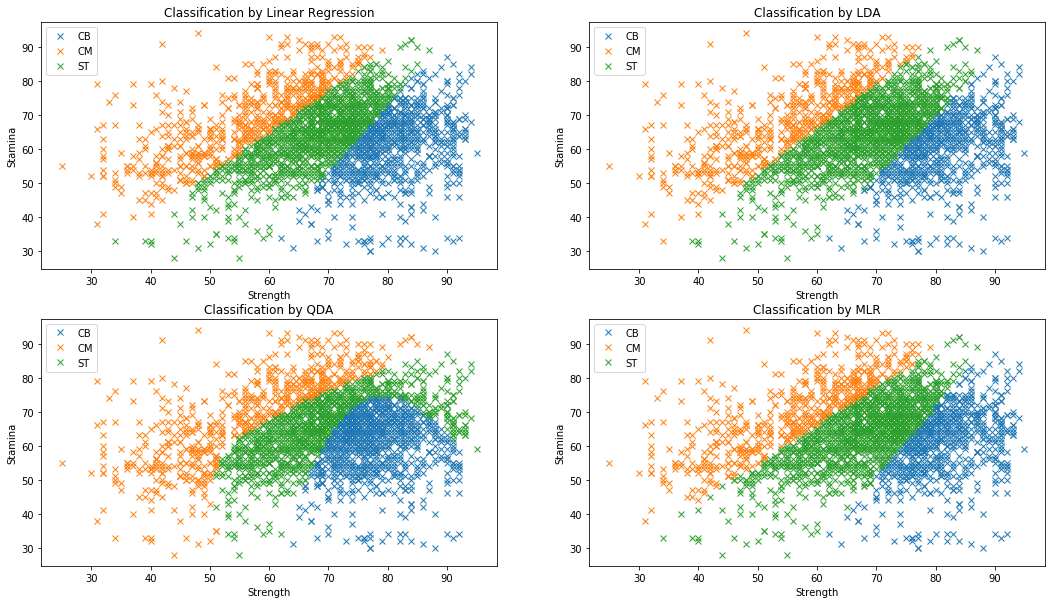

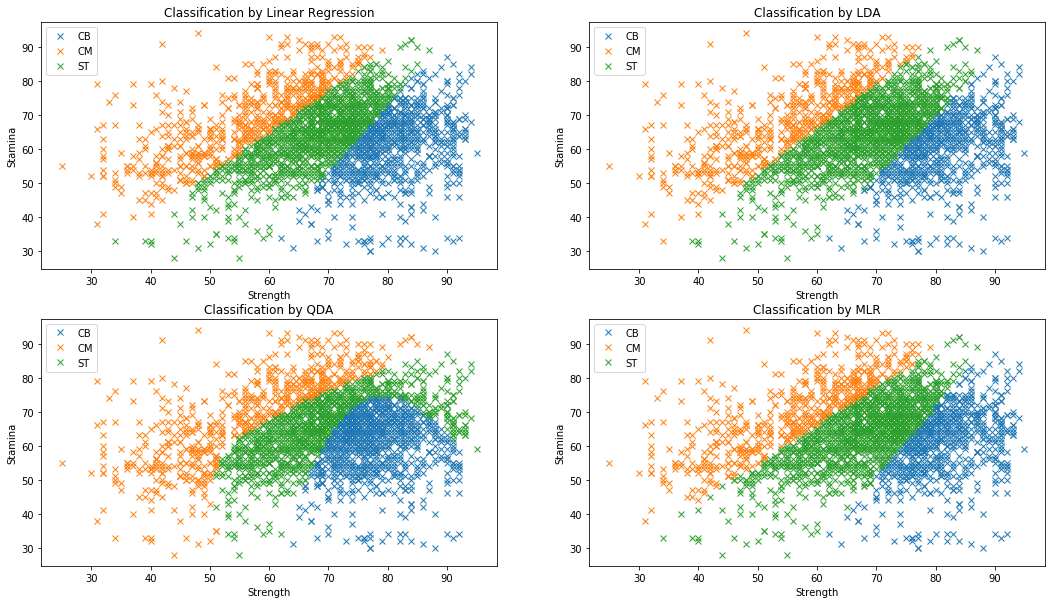

In [14]:
worker.modelPlotAll()

In [15]:
worker.precision

{'Linear Reg': [0.5579896907216495, 0.583904109589041, 0.42089093701996927],
 'LDA': [0.5568685376661743, 0.5907335907335908, 0.4171779141104294],
 'QDA': [0.5532128514056225, 0.5815126050420169, 0.43977591036414565],
 'MLR': [0.5634807417974322, 0.5930018416206262, 0.423836389280677]}

In [16]:
df_precision = pd.DataFrame(worker.precision)

In [17]:
df_precision.round(2)

,Linear Reg,LDA,QDA,MLR
0,0.56,0.56,0.55,0.56
1,0.58,0.59,0.58,0.59
2,0.42,0.42,0.44,0.42


In [18]:
features2 = ['Strength','Stamina','Acceleration','Balance','Reactions','SprintSpeed','Jumping'] 

In [19]:
worker2 = fifa(df, features2, y, y_categ, split)

In [20]:
worker2.precision

{'Linear Reg': [0.7074829931972789, 0.6927803379416283, 0.6164747564216121],
 'LDA': [0.7269585253456221, 0.6891271056661562, 0.6038562664329535],
 'QDA': [0.7121046892039259, 0.7140740740740741, 0.6373831775700934],
 'MLR': [0.7258248009101251, 0.686838124054463, 0.6114081996434938]}

In [31]:
features3 = ['Stamina','Strength','Vision','Balance','Reactions','SprintSpeed','Jumping'] 

In [32]:
worker3 = fifa(df, features3, y, y_categ, split)

In [33]:
df_precision3 = pd.DataFrame(worker3.precision)

In [34]:
df_precision3.round(2)

,Linear Reg,LDA,QDA,MLR
0,0.79,0.84,0.82,0.83
1,0.73,0.76,0.76,0.75
2,0.70,0.71,0.72,0.71


In [25]:
worker3.precision

{'Linear Reg': [0.7739872068230277, 0.7044776119402985, 0.681214421252372],
 'LDA': [0.8446601941747572, 0.721183800623053, 0.6655518394648829],
 'QDA': [0.8325358851674641, 0.7216494845360825, 0.6782911944202267],
 'MLR': [0.8367346938775511, 0.7238689547581904, 0.6658249158249159]}

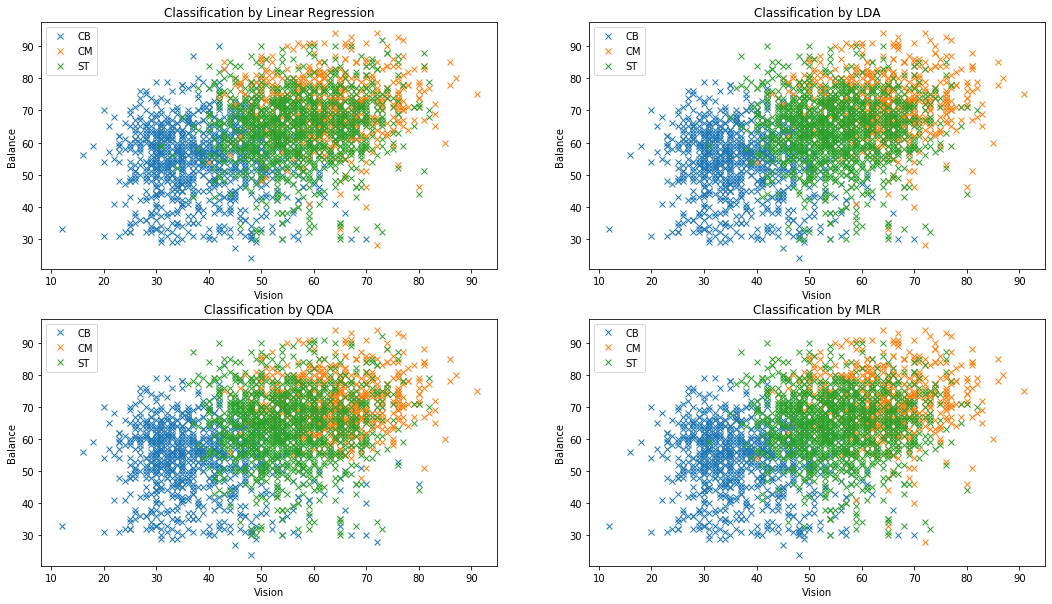

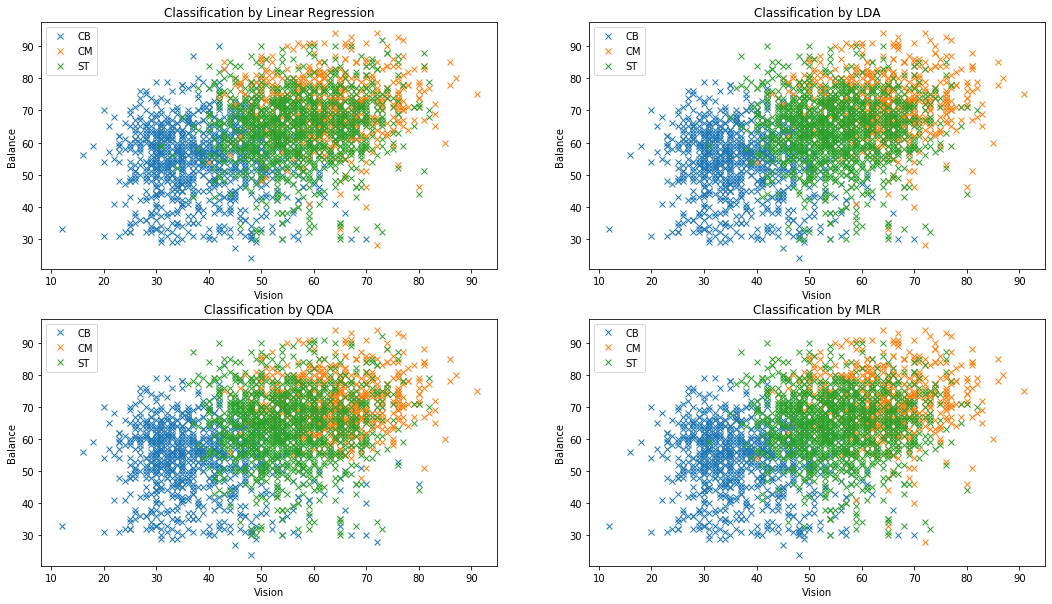

In [26]:
worker3.modelPlotAll()

#### Linear Regression- 
-min max scalar
-model coeficients m.coef_
_barplot
_ridge instead of Lin Regression.
_Decision tree
-plot


In [27]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [28]:
features4 = ['Acceleration','Balance','Reactions','Work Rate','ShortPassing','SprintSpeed','BallControl','LongShots','Vision'] 

In [29]:
worker4 = fifa(df, features4, y, y_categ, split)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
worker4.precision